# FAI Coursework Two -2024
# Introduction

The questions are based on the machine learning algorithms covered in labs. Students are expected to indentify the correct syntax to import modules and call functions. Students are aslo expected to evaluate the performance of different algorithms. 

# Marks

Coursework 2 accounts for 10% of the COMP1037 marks. Corresponding marks will be awarded for answering each of the sub-questions in `FAIcw2.ipynb`. Report should be written using this file as the template.

1. Answer questions using `Markdown` cell.
2. Use `Code` cell to input your code. 
**Note: (a). please run your code in the notebook and upload your notebook together with all the outputs. (b). avoid using problem setting requires more than 3 mins to get the output. (c). Please only import the packages that are offered in our coursework folder or as the question requirement. (d). If you import other external pacakges, we will remove that and mark your code with the remaining code. **


# Plagiarism vs. Group Discussions

As you should know, there is no tolerance of plagiarism, and any breach of which will be dealt with according to the University's standard policies. Please be very careful not to cross the boundary into plagiarism while having general discussions regarding the coursework to promote the generation of new ideas and to enhance the learning experience. The important part is that when you sit down to actually do the work and write the answers, you do it individually. If you do this, and you truly understand what you have written, you will not be guilty of plagiarism. Do NOT, under any circumstances, share code or share figures, graphs or charts, etc.

# Deadline and submission procedure 

## <span style="background-image: linear-gradient(to right, #FF22AA, #FF9264, #FFFF66, #64FFB4, #00A2FF); font-weight:bold; color:white; text-shadow: -1px 0 black, 0 1px black, 1px 0 black, 0 -1px black;">20 marks deducted for not submitting as required！</span>
The submission deadline is 17:00pm on the <font color=red> **10th  May 2024** </font> via Moodle. Late submission results into a 5% reduction of your coursework mark for each day. Any work handed in after the 11:59pm of 13th May will receive <font color=red> **zero marks**.

Name your submission file: <font color=red>FAICW2-XXX.ipynb</font>, where XXX should be your student ID number, for instance, FAICW2-20415678.ipynb, and submit a single file via Moodle.

If you can’t submit your coursework on time due to Extenuating Circumstances, please contact your personal tutor first. I am only granting an extension of submission based on his / her recommendation.

## Part I. Image Classification
Answer the following questions related to the *Pokemon Image Classification Data*. Images of four different pokemons "Bulbasaur","Charmander","Pikachu","Squirtle" are provided. In this part, you will use these images to train a model to classify pokemons, and evaluate the performance.

### [5 Marks] 1. Import necessary modules for the questions below. You could only import modules from the following packages: `numpy`, `matplotlib`, `sklearn`, `PIL`, `os`

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import sklearn

### [10 Marks] 2. Open the directory `Pokemon`, use `matpotlib` to show the first image of each pokemon species.

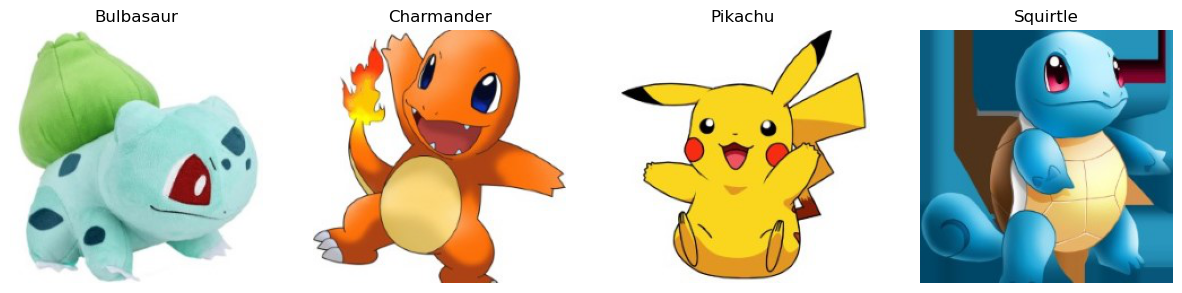

In [5]:
# Define the directory containing the Pokemon images
directory = "Pokemon"

# Define the list of Pokemon species
pokemon_species = ["Bulbasaur", "Charmander", "Pikachu", "Squirtle"]

# Initialize a subplot for displaying the images
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Loop through each Pokemon species and display the first image
for i, species in enumerate(pokemon_species):
    # Get the list of image files for the current species
    file_list = os.listdir(os.path.join(directory, species))
    # Sort the file list to ensure consistent order
    file_list.sort()
    # Load and display the first image of the current species
    img = Image.open(os.path.join(directory, species, file_list[0]))
    axes[i].imshow(img)
    axes[i].set_title(species)
    axes[i].axis('off')

# Show the plot
plt.show()


### [15 Marks] 3. Load all images and their corresponding labels, flatten the images into vectors, and store them in `numpy` arrays. Print out the shape of the input dataset and the shape of the labels.

Hint: You could use the code snippet from lab 6 as the reference, but remember to convert Pokemon names 'Pikachu', 'Bulbasaur', 'Charmander', 'Squirtle' into numerical values 0, 1, 2, 3 as the labels.

In [6]:
def load_images(folder_path):
    '''Load images from the given folder_path and return the flattened images (vectors) and labels'''
    vectors = []
    labels = []
    for label in os.listdir(folder_path):
        species_path = os.path.join(folder_path, label) # os.path.join is used to join one or more path segments
        if species_path != "Pokemon/.DS_Store":  # Check if species_path is not .DS_Store
            for image_path in os.listdir(species_path):
                image = Image.open(os.path.join(species_path, image_path)) # open the image file
                image = np.array(image) # convert the image to a numpy array
                vector = image.reshape(-1) # flatten the image to a vector
                vectors.append(vector) # add the image to the list
                #convert Pokemon names 'Pikachu', 'Bulbasaur', 'Charmander','Squirtle'
                if label == 'Bulbasaur' : label = '0'
                elif label == 'Charmander' : label = '1'
                elif label == 'Pikachu' :label = '2'
                elif label == 'Squirtle' : label = '3'
                labels.append(label) # add the label to the list
    return np.array(vectors), np.array(labels) # convert the list of images and labels to numpy arrays

vectors,labels = load_images('Pokemon')
#print(np.array(vectors))
#print(np.array(Lables))
print('vectors shape:',vectors.shape)
print('labels shape:',labels.shape)


vectors shape: (321, 150528)
labels shape: (321,)


### [10 Marks] 4. Use `sklearn.model_selection.train_test_split` to split the dataset into training and testing sets. Use 80% of the data for training and 20% for testing. Set a custom random seed (e.g., `random_state=1`) to ensure reproducibility.

In [7]:
from sklearn.model_selection import train_test_split

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(vectors, labels, test_size=0.2, random_state=1)

# Print shapes of training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (256, 150528)
Shape of y_train: (256,)
Shape of X_test: (65, 150528)
Shape of y_test: (65,)


### [30 Marks] 5. Use `MLPClassifier` class from the `sklearn.neural_network` as the classifer. Train the model on the training set and evaluate the performance on the testing set. Adjust the parameters of the MLP classifier and observe the changes in the accuracy. Try <u>**three**</u> different parameter configurations, then write a analysis report in a markdown cell. In your report, please specify which parameter setting is the best and explain why. 
Please set your parameters according to the following requirement:<br>
(1). Possible activiation functions: `identity`, `logistic`, `tanh`, and `relu`.<br>
(2). Number of maximum iterations: <=200.<br>
(3). Number of hidden layers: 2~5, each with neuros of no more than 30.<br>
(4). You could specify a custom `learning_rate_init`.<br>
(5). Set a custom random seed (i.e., `random_state=1`) to ensure reproducibility.<br>
(6). Please fix the other two parameter in MLPClassifier as verbose=True, n_iter_no_change=20.


In [8]:
from sklearn.neural_network import MLPClassifier

# First configuration
mlp_clf = MLPClassifier(hidden_layer_sizes=(20, 20), activation='identity', learning_rate_init=0.001, max_iter=200, random_state=1, verbose=True, n_iter_no_change=20)
mlp_clf.fit(X_train, y_train)

predicted_labels = mlp_clf.predict(X_test)
print('predicted labels (Config 1):', predicted_labels)
accuracy = np.mean(predicted_labels == y_test)
print('accuracy (Config 1):', accuracy)


# Second configuration
mlp_clf = MLPClassifier(hidden_layer_sizes=(30, 30, 30), activation='logistic', learning_rate_init=0.01, max_iter=200, random_state=1, verbose=True, n_iter_no_change=20)
mlp_clf.fit(X_train, y_train)

predicted_labels = mlp_clf.predict(X_test)
print('predicted labels (Config 2):', predicted_labels)
accuracy = np.mean(predicted_labels == y_test)
print('accuracy (Config 2):', accuracy)

# Third configuration
mlp_clf = MLPClassifier(hidden_layer_sizes=(20, 20, 20, 20), activation='relu', learning_rate_init=0.0001, max_iter=200, random_state=1, verbose=True, n_iter_no_change=20)
mlp_clf.fit(X_train, y_train)

predicted_labels = mlp_clf.predict(X_test)
print('predicted labels (Config 3):', predicted_labels)
accuracy = np.mean(predicted_labels == y_test)
print('accuracy (Config 3):', accuracy)




Iteration 1, loss = 26.74464155
Iteration 2, loss = 29.42629129
Iteration 3, loss = 26.67522375
Iteration 4, loss = 22.94970068
Iteration 5, loss = 23.93527078
Iteration 6, loss = 23.65367949
Iteration 7, loss = 21.11935951
Iteration 8, loss = 20.97856291
Iteration 9, loss = 21.96413066
Iteration 10, loss = 18.30344685
Iteration 11, loss = 14.92445942
Iteration 12, loss = 24.07606441
Iteration 13, loss = 21.82333683
Iteration 14, loss = 16.99092356
Iteration 15, loss = 16.61390326
Iteration 16, loss = 15.76913034
Iteration 17, loss = 10.84128736
Iteration 18, loss = 10.55969666
Iteration 19, loss = 10.70049251
Iteration 20, loss = 10.13731073
Iteration 21, loss = 8.86729078
Iteration 22, loss = 5.63185464
Iteration 23, loss = 3.80151318
Iteration 24, loss = 6.54774408
Iteration 25, loss = 8.86892906
Iteration 26, loss = 8.01645230
Iteration 27, loss = 5.49106033
Iteration 28, loss = 2.67515001
Iteration 29, loss = 5.63185606
Iteration 30, loss = 3.80151442
Iteration 31, loss = 4.083105

# Report
## Based on the shown data, I have trained three different classifier configurations, with the multiple configurations producing varying accuracy.
#### First parameter configuration 
- Activation Function: identity
- Hidden Layer Sizes: (20, 20)
- Learning Rate Init: 0.001
- Max Iterations: 200
- Random State: 1
- Verbose: True
- No Change Iterations: 20
- Accuracy: 86.15%
- The training process is stable and there is no significant overfitting.
#### Second parameter configuration
- Activation Function: logistic
- Hidden Layer Sizes: (30, 30, 30)
- Learning Rate Init: 0.01
- Max Iterations: 200
- Random State: 1
- Verbose: True
- No Change Iterations: 20
- Accuracy: 40%
- The training process is stable and there is no significant overfitting.
#### Third parameter configuration:
- Activation Function: relu
- Hidden Layer Sizes: (20, 20, 20, 20)
- Learning Rate Init: 0.0001
- Max Iterations: 200
- Random State: 1
- Verbose: True
- No Change Iterations: 20
- Accuracy: 41.54%
- The training process is stable and there is no significant overfitting.
### First parameter configuration appears to have the highest accuracy among the configurations provided. Config 2 and Config 3 have relatively lower accuracies compared to Config 1.
### Reasons for accuracy differences：
#### Choices of Activation Function:
- The first set of data uses the identity activation function, which is a linear function that does not perform nonlinear transformation on the output of the hidden layer neurons. This may limit the expressive power of the model, but the characteristics of the data set are indeed linear, then using an identity activation function may be appropriate.
- The second set of data used the logistic activation function, also known as the Sigmoid function. It can map the input to between 0 and 1 and is suitable for dealing with binary classification problems. However, it is prone to the vanishing gradient problem in deep neural networks. Despite having more neurons and layers, it fails to capture the underlying patterns effectively, leading to lower accuracy.
- The third set of data uses the ReLU (Rectified Linear Unit) activation function, which has linear properties in the positive value area, which can accelerate the convergence of the model and does not cause the problem of gradient disappearance. However, its output is zero in the negative value area, which may cause the problem of neuron "death" and reduce the expressive ability of the model. Because of  the ReLU activation function with a very low learning rate. Despite having more layers, the low learning rate might have hindered convergence, leading to suboptimal performance.
#### Hidden Layer Sizes:
- The size of the hidden layers differs across configurations, impacting the model's capacity to extract features from the data.
#### Learning Rate Initialization:
- The initial value of the learning rate in different configurations is also different, which will affect the speed of parameter update of the model during the training process. A learning rate that is too high may cause the training process to be unstable, and a learning rate that is too low may cause the training speed to be slow. The initial value of the learning rate for the first parameter configuration of data is 0.001, the second parameter configuration is 0.01, and the third parameter configuration is 0.0001.
### Conclusion
- The first paratemer configuration  is the best configuration based on the accuracy provided. It achieved the highest accuracy among the three configurations, indicating that the architecture of the identity activation function and two hidden layers (20 neurons each) is well suited for this dataset. Furthermore, a moderate learning rate seems to facilitate efficient learning without convergence issues.

### [10 marks] 6. Try to use another classifier (only need to choose one) which we have seen in the previous tutorials to classify the images, such as `Decision Tree`. Compare the performance of the chosen classifier with the MLP classifier in the previous question, <u>briefly</u> explain the reason why the result is better or worse in the markdown cell.

In [45]:
from sklearn.tree import DecisionTreeClassifier

# Define and train the Decision Tree classifier
decision_tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=1)
decision_tree_clf.fit(X_train, y_train)

# Calculate accuracy
predicted_labels = decision_tree_clf.predict(X_test)
accuracy = np.mean(predicted_labels == y_test)
print('Decision Tree accuracy:', accuracy)

Decision Tree accuracy: 0.7384615384615385


# Report
#### MLP Classifier 
#### First parameter configuration 
- Activation Function: identity
- Hidden Layer Sizes: (20, 20)
- Learning Rate Init: 0.001
- Accuracy: 86.15%
- The training process is stable and there is no significant overfitting.
#### Second parameter configuration
- Activation Function: logistic
- Hidden Layer Sizes: (30, 30, 30)
- Learning Rate Init: 0.01
- Accuracy: 40%
- The training process is stable and there is no significant overfitting.
#### Third parameter configuration:
- Activation Function: relu
- Hidden Layer Sizes: (20, 20, 20, 20)
- Learning Rate Init: 0.0001
- Accuracy: 41.54%
- The training process is stable and there is no significant overfitting.
### First parameter configuration appears to have the highest accuracy among the configurations provided. Config 2 and Config 3 have relatively lower accuracies compared to Config 1.
#### Decision Tree Classifier:
- Random State: 1
- Accuracy: 73.85%
### Compared with the accuracy of the decision tree classifier 73.85%, the MLP classifier with the first parameter configuration has the highest accuracy of 86.15%. The accuracy of MLP classifier configured with second and third parameters is lower than that of decision tree classifier.
### Reasons for the performance differences:
#### Complexity of Data:
- Compared with decision tree classifiers, MLPS can capture complex nonlinear relationships that exist in data sets. Therefore, the MLP classifier with the first parameter configuration is better able to capture these complex patterns.
#### Model Flexibility:
- Compared to decision trees, MLPs offer greater flexibility in learning representations from data, especially when dealing with high-dimensional or complex data. the MLP classifier with the first parameter configuration is better suited to capture the nuances of the dataset.
#### Data size:
- For small data sets, decision trees will perform better because they are easy to generalize. 
For larger data sets, an MLP usually performs better because it can learn complex patterns and relationships from the rich data.
### In conclusion, compared with decision tree classifiers, MLP classifiers have the ability to handle complex, high-dimensional data and effectively capture nonlinear relationships. In addition, the flexibility of the MLP and its ability to adapt to the complexity of the data set also improves its performance on large data sets. Therefore，the accuracy of MLP classifier with the first parameter configuration is higher than the accuracy of decision tree.


## Part II. Answer the following questions related to the MDP problem.

A student is being chased around the school yard by bullies and must choose whether to Fight or Run. Three states are considered:<br>
– Ok (O), when he is fine for the moment.<br>
– Caught (C), When the bullies catch up with him and give him noogies<br>
– Danger (D), when the bullies are right on his heels and will pursuit him quickly.<br>

Let's assume the student begins in state of 'O'. In each state, he has two actions: "run" or "fight".The transtion probabilities and rewards are defined in the image below. 

<img src='.\mdp_pic.jpg' width=50%>

### [20 Marks] Import necessary modules and calculte the optimal value and optimal policy for each state using epsilon of 0.001 and gamma of 0.9. Print your results.

In [1]:
# Import necessary modules
from mdp4e import *

# Define transition probabilities, rewards, and actions for each state
t = {
    "O": {
            "R": [(0.5, "O"), (0.5, "D")],
            "F": [(0.2, "C"), (0.8, "O")]
         },
    "D": {
            "R": {(0.3, "D"), (0.3, "C"), (0.4, "O")},
            "F": {(0.2, "D"), (0.25, "O"), (0.55, "C")}
         },
    "C": {
            "R": {(0.3, "C"), (0.7, "D")},
            "F": {(0.3, "O"), (0.7, "C")}
         },
    
}
init = "O"

rewards = {
    'O': +2,
    'D': -1,
    'C': -4
}
class CustomMDP(MDP):
    def __init__(self, init, terminals, transitions, reward=None , gamma=.9):
        # All possible actions.
        actlist = []
        for state in transitions.keys():
            actlist.extend(transitions[state])
        actlist = list(set(actlist))
        MDP.__init__(self, init, actlist, terminals, transitions, reward, gamma=gamma)

    def T(self, state, action):
        if action is None:
            return [(0.0, state)]
        else: 
            return self.transitions[state][action]



In [2]:
mymdp = CustomMDP(init=init,terminals=[],transitions=t,reward=rewards,gamma=0.9)
optimal_values = value_iteration(mymdp, 0.001)
print("Optimal Value:")
print(optimal_values)

Optimal Value:
{'D': -3.95552261628855, 'C': -8.892981470798096, 'O': 1.4263075351268535}


In [3]:
optimal_policy = best_policy(mymdp, value_iteration(mymdp, 0.001))
print("Optimal Policy:")
print(optimal_policy)

Optimal Policy:
{'D': 'R', 'C': 'R', 'O': 'F'}
